In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data=pd.read_csv("bank-additional-full.csv",sep=';')
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [30]:
#dropping duration and row with no values

data=pd.get_dummies(data)
data.drop(["duration","y_no"],axis=1)
data.shape
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


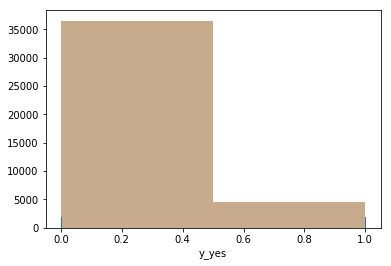

In [46]:
#plotting histogram of y_yes
yes_col=data["y_yes"]
plot=sns.distplot(a=yes_col,kde=False,bins=2,hist=True)
plt.show()

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
X=data.drop(["y_yes"],axis=1)
Y=data["y_yes"]
clf=ExtraTreesClassifier(n_estimators=100)
#10-fold cross-val of model
score=cross_val_score(clf,X,Y,cv=10)
print("Acurracy: %0.3f +/-%0.3f"%(score.mean(),score.std()*2))


Acurracy: 0.953 +/-0.283


In [73]:
#splitting data to train and test set
x_train, x_test, y_train, y_test=train_test_split(X, Y,test_size=0.4,random_state=0)
#training on test set
clf.fit(x_train,y_train)
#prediciting on test set
prediction=clf.predict(x_test)
#printing a confusin matrix of predicitons

print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

1.0
[[14655     0]
 [    0  1821]]
